# Avaliação #1: Modelagem e Mineração de Dados
## Mestrado em Modelagem Matemática da Informação
### Professor: Renato Souza                                                      ||  2016-07-12
### Alunos: Ana Angélica Soares, Bruno Cuconato, Laura Sant'Anna

____

## Estudo sobre a relação entre armas de fogo e crime nos Estados Unidos, 1980-2013.
#### Base de dados disponível no [GitHub](https://github.com/jldbc/gunsandcrime).

pmh ≡ por milhão de habitantes

Povoando o ambiente com os pacotes necessários.

In [85]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import scipy.stats as ss
import seaborn as sns
import cufflinks as cf
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='lauragualda', api_key='473bme0s4w')

In [86]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16.5, 6.4)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


___
### Extração e tratamento dos dados

Importando a base de dados em formato .csv para o dataframe pandas.

In [87]:
gunzz = pd.read_csv('gun_crime_data.csv')
gunzz.head()

,year,pop,ampct,metpct,unrate,prison,totemployed,employ,military,rpci,...,mc_noburg,gunsamm,amrmms,amhms,phg,pgun,mc_noassault,r1524,r2544,r4564
0,2013,316500.0,0.129,0.81,7.4,4077.436,136394,0.430945,4.739336,30518,...,1290.995,420577.0,2200000.0,925238.0,23.91000,29.14000,977.5071,12.16,20.0,26.76
1,2012,314110.0,0.128,0.81,8.1,4065.240,134098,0.426914,4.937761,29161,...,1371.663,392122.0,1900000.0,915060.0,22.75591,33.77953,1100.7190,12.16,20.0,26.76
2,2011,311720.0,0.127,0.81,8.9,4139.755,131843,0.422953,5.078275,29005,...,1400.010,378380.0,1700000.0,1000000.0,21.18000,33.89000,1138.5090,12.16,20.0,26.76
3,2010,310232.8,0.127,0.81,9.6,4177.352,130269,0.419907,5.163864,28838,...,1475.788,404150.0,1800000.0,1100000.0,19.54211,31.39820,1162.0530,12.16,20.0,26.76
4,2009,307006.5,0.126,0.81,9.3,4232.373,131220,0.427418,5.182301,29274,...,1569.885,414150.0,1800000.0,954901.0,20.78000,39.66000,1249.1490,12.40,22.0,26.20


Observando se há observações faltantes, e o tipo dos dados.

In [88]:
gunzz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 33 columns):
year                       34 non-null int64
pop                        34 non-null float64
ampct                      34 non-null float64
metpct                     34 non-null float64
unrate                     34 non-null float64
prison                     34 non-null float64
totemployed                34 non-null int64
employ                     34 non-null float64
military                   34 non-null float64
rpci                       34 non-null int64
domestic_gun_production    28 non-null float64
gallup_owngun              24 non-null float64
pgs                        34 non-null float64
totmajor                   34 non-null int64
murder                     34 non-null float64
rape                       34 non-null float64
robbery                    34 non-null float64
assault                    34 non-null float64
burglary                   34 non-null float64
hg          

Fazendo uma cópia do dataframe, e colocando os anos como índice do dataframe.

In [89]:
guns_year = gunzz.copy()
guns_year = guns_year.set_index(['year'])
guns_year.head()

,pop,ampct,metpct,unrate,prison,totemployed,employ,military,rpci,domestic_gun_production,...,mc_noburg,gunsamm,amrmms,amhms,phg,pgun,mc_noassault,r1524,r2544,r4564
year,,,,,,,,,,,,,,,,,,,,,
2013,316500.0,0.129,0.81,7.4,4077.436,136394,0.430945,4.739336,30518,10491671.0,...,1290.995,420577.0,2200000.0,925238.0,23.91000,29.14000,977.5071,12.16,20.0,26.76
2012,314110.0,0.128,0.81,8.1,4065.240,134098,0.426914,4.937761,29161,8291056.0,...,1371.663,392122.0,1900000.0,915060.0,22.75591,33.77953,1100.7190,12.16,20.0,26.76
2011,311720.0,0.127,0.81,8.9,4139.755,131843,0.422953,5.078275,29005,6244998.0,...,1400.010,378380.0,1700000.0,1000000.0,21.18000,33.89000,1138.5090,12.16,20.0,26.76
2010,310232.8,0.127,0.81,9.6,4177.352,130269,0.419907,5.163864,28838,5217263.0,...,1475.788,404150.0,1800000.0,1100000.0,19.54211,31.39820,1162.0530,12.16,20.0,26.76
2009,307006.5,0.126,0.81,9.3,4232.373,131220,0.427418,5.182301,29274,5361074.0,...,1569.885,414150.0,1800000.0,954901.0,20.78000,39.66000,1249.1490,12.40,22.0,26.20


In [90]:
guns_year = guns_year.sort_index(ascending=True) #ordenando o índice do dataframe
guns_year.head()

,pop,ampct,metpct,unrate,prison,totemployed,employ,military,rpci,domestic_gun_production,...,mc_noburg,gunsamm,amrmms,amhms,phg,pgun,mc_noassault,r1524,r2544,r4564
year,,,,,,,,,,,,,,,,,,,,,
1980,226549.0,0.116950,0.737377,7.2,1262.872,90531,0.399609,9.225377,21309,NaN,...,1718.569,NaN,NaN,NaN,23.31034,47.58620,2563.966,19.34262,28.24698,19.41109
1981,229466.0,0.117309,0.738659,7.6,1394.869,91292,0.397845,9.247558,21178,NaN,...,1850.204,NaN,NaN,NaN,22.40000,40.53000,2732.196,18.88817,28.71920,19.35852
1982,231665.0,0.117653,0.739896,9.7,1561.840,89684,0.387128,9.267693,21160,NaN,...,1915.827,NaN,NaN,NaN,21.58904,44.16438,2681.320,18.43373,29.19141,19.30595
1983,233790.0,0.118004,0.741158,9.6,1651.548,90289,0.386197,9.251893,21470,NaN,...,1897.665,NaN,NaN,NaN,22.07000,46.41000,2557.303,17.97929,29.66363,19.25339
1984,235827.0,0.118403,0.742295,7.5,1733.683,94543,0.400900,9.235583,22422,NaN,...,1859.592,NaN,NaN,NaN,21.55113,45.43583,2343.307,17.52485,30.13585,19.20082


In [91]:
# verificando ordem
guns_year.tail()

,pop,ampct,metpct,unrate,prison,totemployed,employ,military,rpci,domestic_gun_production,...,mc_noburg,gunsamm,amrmms,amhms,phg,pgun,mc_noassault,r1524,r2544,r4564
year,,,,,,,,,,,,,,,,,,,,,
2009,307006.5,0.126,0.81,9.3,4232.373,131220,0.427418,5.182301,29274,5361074.0,...,1569.885,414150.0,1800000.0,954901.0,20.78000,39.66000,1249.1490,12.40,22.0,26.20
2010,310232.8,0.127,0.81,9.6,4177.352,130269,0.419907,5.163864,28838,5217263.0,...,1475.788,404150.0,1800000.0,1100000.0,19.54211,31.39820,1162.0530,12.16,20.0,26.76
2011,311720.0,0.127,0.81,8.9,4139.755,131843,0.422953,5.078275,29005,6244998.0,...,1400.010,378380.0,1700000.0,1000000.0,21.18000,33.89000,1138.5090,12.16,20.0,26.76
2012,314110.0,0.128,0.81,8.1,4065.240,134098,0.426914,4.937761,29161,8291056.0,...,1371.663,392122.0,1900000.0,915060.0,22.75591,33.77953,1100.7190,12.16,20.0,26.76
2013,316500.0,0.129,0.81,7.4,4077.436,136394,0.430945,4.739336,30518,10491671.0,...,1290.995,420577.0,2200000.0,925238.0,23.91000,29.14000,977.5071,12.16,20.0,26.76


Ajeitando as percentagens que não estavam expressas em valores decimais.

In [92]:
pctvar=['unrate', 'gallup_owngun', 'hg', 'gun', 'phg', 'pgun', 'r1524', 'r2544', 'r4564']
for p in pctvar:
    # CUIDADO pra não rodar mais de uma vez e zoar os dados.
    guns_year[p] = 0.01*guns_year[p]
guns_year.head()

,pop,ampct,metpct,unrate,prison,totemployed,employ,military,rpci,domestic_gun_production,...,mc_noburg,gunsamm,amrmms,amhms,phg,pgun,mc_noassault,r1524,r2544,r4564
year,,,,,,,,,,,,,,,,,,,,,
1980,226549.0,0.116950,0.737377,0.072,1262.872,90531,0.399609,9.225377,21309,NaN,...,1718.569,NaN,NaN,NaN,0.233103,0.475862,2563.966,0.193426,0.282470,0.194111
1981,229466.0,0.117309,0.738659,0.076,1394.869,91292,0.397845,9.247558,21178,NaN,...,1850.204,NaN,NaN,NaN,0.224000,0.405300,2732.196,0.188882,0.287192,0.193585
1982,231665.0,0.117653,0.739896,0.097,1561.840,89684,0.387128,9.267693,21160,NaN,...,1915.827,NaN,NaN,NaN,0.215890,0.441644,2681.320,0.184337,0.291914,0.193059
1983,233790.0,0.118004,0.741158,0.096,1651.548,90289,0.386197,9.251893,21470,NaN,...,1897.665,NaN,NaN,NaN,0.220700,0.464100,2557.303,0.179793,0.296636,0.192534
1984,235827.0,0.118403,0.742295,0.075,1733.683,94543,0.400900,9.235583,22422,NaN,...,1859.592,NaN,NaN,NaN,0.215511,0.454358,2343.307,0.175249,0.301359,0.192008


___
## Evolução das variáveis de crimes ao longo do tempo

In [93]:
crimes = ['murder', 'rape','robbery','burglary','assault']
crimes_p = ['Assassinatos','Estupros','Roubos','Roubos à propriedade','Crimes de lesão corporal']

lista_1 = []
lista_2 = []
for i in crimes:
    media_1 = round(np.mean(guns_year[i][0:19]),2)
    lista_1.append(media_1)
    
    media_2 = round(np.mean(guns_year[i][19:35]),2)
    lista_2.append(media_2)

In [94]:
fig = {
  "data": [
     {"values": lista_1,
      "labels": crimes_p,
      "text":" 1980 - 1998 ",
      "domain": {"x": [0, .48]},
      "name": "1980 - 1998",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"},     
     {"values": lista_2,
      "labels": crimes_p,
      "text":"1999-2013",
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": " 1999 - 2013 ",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"}],
  "layout": {"title":"Ocorrência de Crimes Graves","annotations": [
            {"font": {"size": 20},
                "showarrow": False,
                "text": "1980 - 1998",
                "x": 0.16,
                "y": 0.5},
            {"font": {"size": 20},
                "showarrow": False,
                "text": "1999 - 2013",
                "x": 0.84,
                "y": 0.5}]}}
py.iplot(fig)

In [95]:
import xlwt
from tempfile import TemporaryFile

book = xlwt.Workbook()
sheet1 = book.add_sheet('sheet1')

crimes_2 = ['crime','Assassinatos','Estupros','Roubos','Roubos à propriedade','Crimes de lesão corporal', 
            'Assassinatos','Estupros','Roubos','Roubos à propriedade','Crimes de lesão corporal']

lista = ['quantity']
for i in crimes:
    media_1 = round(np.mean(guns_year[i][0:19]),2)
    lista.append(media_1)
for i in crimes:    
    media_2 = round(np.mean(guns_year[i][19:35]),2)
    lista.append(media_2)

anos = ['year','1980-1998','1980-1998','1980-1998','1980-1998','1980-1998','1999-2013','1999-2013','1999-2013','1999-2013',
        '1999-2013']

for i,e in enumerate(crimes_2):
    sheet1.write(i,1,e)

for i,e in enumerate(lista):
    sheet1.write(i,2,e)    
    
for i,e in enumerate(anos):
    sheet1.write(i,3,e)

name = "media.xls"
book.save(name)
book.save(TemporaryFile())

xls = pd.ExcelFile('media.xls')
media = pd.read_excel(xls, 'sheet1')

cf.set_config_file(offline=False, world_readable=True, theme='pearl')

media.iplot(kind='bubble', x='year', y='crime', categories='crime', size='quantity', text='quantity',
             title='Ocorrência de crimes graves', legend=False)

Podemos observar que, em média, no período contemplado pelo estudo original de Marvell & Moody (1996),os crimes de roubo à propriedade eram os mais frequentes, seguidos de crimes de lesão corporal. Já no período adicionado pelo estudo de LeDoux et al.(2015), essa ordem se inverte, puxada pela forte queda dos crimes de roubo à propriedade. Embora a ocorrência de crimes de lesão corporal tenha diminuído entre os dois períodos observados, a categoria passou a representar quase metade dos crimes graves entre 1999-2013. 
Já os roubos, estupros e assassinatos, que correspondiam a 20,5% dos crimes graves no período 1980-1998, passaram a representar apenas 17,42% no período seguinte. 
Em todos os tipos de crime a queda foi bastante significativa ao longo dos anos, como observaremos nos gráficos a seguir:

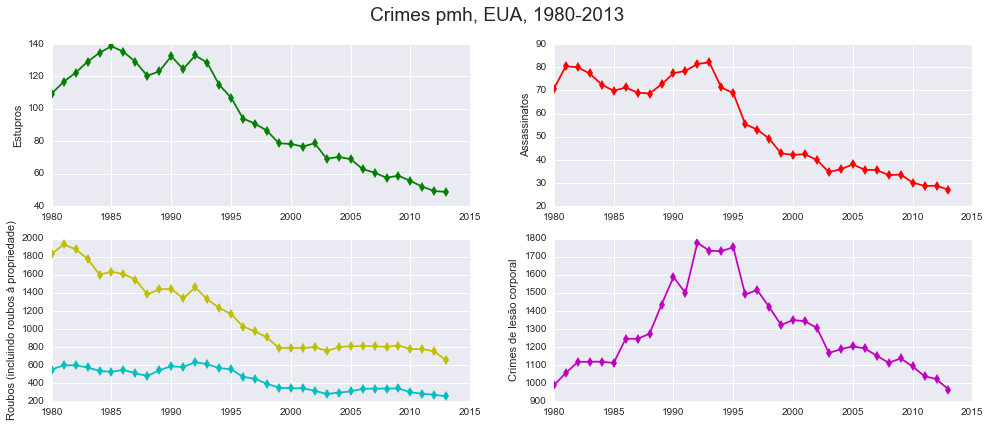

In [96]:
plt.figure()
plt.suptitle('Crimes pmh, EUA, 1980-2013', fontsize = 19)

plt.subplot(2,2,1)
plt.plot(guns_year['rape'], 'gd-')
plt.ylabel('Estupros')

plt.subplot(2,2,2)
plt.plot(guns_year['murder'], 'rd-')
plt.ylabel('Assassinatos')

plt.subplot(2,2,3)
plt.plot(guns_year['robbery'], 'cd-')
plt.plot(guns_year['burglary'], 'yd-')
plt.ylabel('Roubos (incluindo roubos à propriedade)')

plt.subplot(2,2,4)
plt.plot(guns_year['assault'], 'md-')
plt.ylabel('Crimes de lesão corporal')

A surpreendente diminuição das taxas de crimes violentos nos Estados Unidos na década de 1990 (bastante evidentes nos gráficos acima, principalmente a partir de 1995) foi alvo de estudos acadêmicos, tais como "Understanding Why Crimes Fell in the 1990's" Four Factors that Explain the Decline and Six that Do Not", do professor da Chicago university Steven D. Levitt. Segundo o autor, são quatro as principais razões para o declínio dos crimes violentos nos EEUU: aumento da população carcerária (variável presente neste estudo), maior contigente policial, declínio do crack e legalização do aborto (Levitt, 2004).

A pesquisa não encontrou evidências de que uma legislação mais restrita de controle de armas contribuiu para tal queda de crimes violentos a partir de 1995. No entanto, investigações futuras podem considerar o Federal Assault Weapons BanAct de 1994(AWB) - não citado neste paper, mas que proíbe a produção de certas armas semi-automáticas para uso civil. 


___
## _Proxies_ para posse de armas de fogo

O autor (LeDoux et al., 2015) que replica o estudo original de Marvell & Moody (1996) retoma alguns _proxies_ para a posse de armas de fogo.  LeDoux acredita que é a ausência desse dado que torna a pesquisa empírica contraditória, com alguns autores encontrando efeito positivo da posse de armas sobre criminalidade e outros autores encontrando resultado contrário.  Nesta seção buscamos definir qual dentre os _proxies_ oferecidos na base de dados parece ser o melhor representante da posse de armas nos EUA.

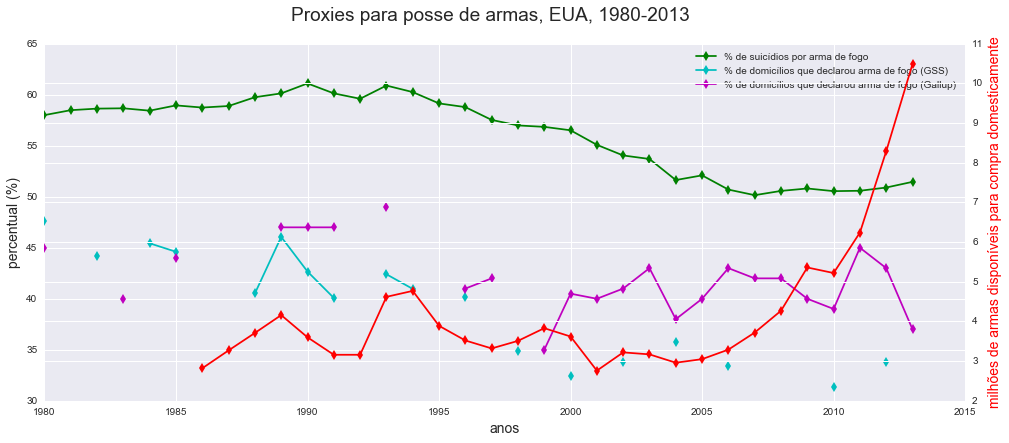

In [97]:
fig, ax1 = plt.subplots()
plt.suptitle('Proxies para posse de armas, EUA, 1980-2013', fontsize = 19)

x = guns_year.index.values
y1 = 100*guns_year['pgs']
y2 = 100*guns_year['gun']
y3 = 100*guns_year['gallup_owngun']
y4 = round((10**-6)*guns_year['domestic_gun_production'], 2)

ax2 = ax1.twinx()
line1,= ax1.plot(x, y1, 'gd-', label = '% de suicídios por arma de fogo')
line2, = ax1.plot(x, y2, 'cd-', label = '% de domicílios que declarou arma de fogo (GSS)')
line3, = ax1.plot(x, y3, 'md-', label = '% de domicílios que declarou arma de fogo (Gallup)')
line4 = ax2.plot(x, y4, 'rd-')

ax1.set_xlabel('anos', fontsize=14)
ax1.set_ylabel('percentual (%)', fontsize=14)
ax2.set_ylabel('milhões de armas disponíveis para compra domesticamente', color='r',fontsize=14)


ax1.legend()
plt.show()

Na ausência de mensuração direta da posse de armas de fogo no EUA, a melhor opção de _proxy_ seria a autodeclaração feita em uma pesquisa como a General Social Survey ou uma Gallup.  Opta-se pelos dados da General Social Survey (GSS), pois acredita-se que a pesquisa feita pelo _National Opinion Research Center_ da Universidade de Chicago tem desenho melhor do que uma pesquisa da Gallup.  

Os dados de produção doméstica de armas de fogo foram subtraídos pelos autores das exportações americanas, porém não foram acrescidos das importações feitas pelo países -- o que potencialmente atrapalha o uso de armas disponíveis para venda doméstica como _proxy_.  O Brasil foi o maior exportador de armas de fogo para os EUA em 2013, exportando três vezes mais armas para os EUA do que os EUA exportaram armas para o mundo ([Bureau of Alcohol, Tobacco, Firearms and Explosives, 2014](https://www.atf.gov/file/3336/download)).  Outro fator que prejudica essa _proxy_ é o fato de que armas são bens de consumo duráveis e não se sabe a sua taxa de depreciação, de modo que usar as armas disponíveis em um dado ano como _proxy_ para o estoque de armas não faz muito sentido.

Plotando variável __majorcrime__ (total de crimes graves pmh; igual à soma das outras variáveis de crime), e produção doméstica de armas de fogo.

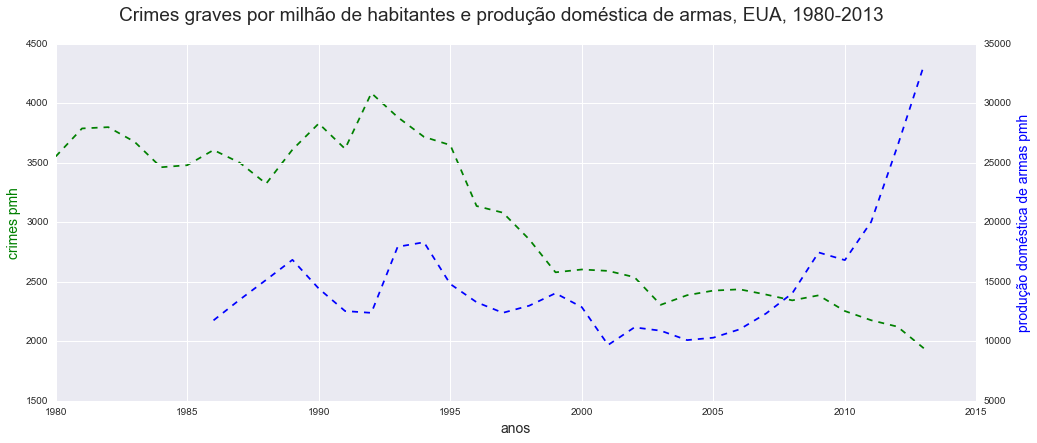

In [98]:
fig, ax1 = plt.subplots()
plt.suptitle('Crimes graves por milhão de habitantes e produção doméstica de armas, EUA, 1980-2013', fontsize = 19)

x = guns_year.index.values
y1 = guns_year['majorcrime']
y2 = guns_year['domestic_gun_production']*(10**6)/((10**3)*guns_year['pop'])

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g--')
ax2.plot(x, y2, 'b--')

ax1.set_xlabel('anos', fontsize=14)
ax1.set_ylabel('crimes pmh', color='g', fontsize=14)
ax2.set_ylabel('produção doméstica de armas pmh', color='b',fontsize=14)

plt.show()

Até 2005 as duas curvas têm movimento parecido, sugerindo uma relação positiva entre as duas variáveis - quanto maior a produção doméstica de armas, maior a ocorrência de crimes graves. Mas a partir de 2005 essa relação se inverteu, a ocorrência de crimes graves continuou em tendência de queda enquanto a produção doméstica de armas disparou. Uma possível explicação para esse paradoxo é que parte dessa produção é destinada a exportações, e portanto o aumento da demanda externa pode ter sido o responsável por esse boom na produção de armas nos EUA.

___
## Variáveis de controle

Uma análise descritiva básica.

### Média, desvio-padrão, e percentis

In [99]:
controle = ['employ', 'unrate', 'r1524', 'metpct', 'ampct', 'pgun', 'rpci', 'prison','military']
col_desc = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

desc_ctrl = pd.DataFrame(index=col_desc, columns=controle)
desc_ctrl = desc_ctrl.fillna(0)
#desc_ctrl

In [100]:
for c in controle:
    desc = guns_year[c].describe()
    desc_ctrl[c] = round(desc,2)
print(desc_ctrl[1:])

# alternativamente,
# desc1 = guns_year[controle].describe()
# desc2 = desc1.transpose()
# desc2

      employ  unrate  r1524  metpct  ampct  pgun      rpci   prison  military
mean    0.43    0.06   0.15    0.77   0.12  0.39  26996.47  3187.43      6.62
std     0.02    0.02   0.02    0.03   0.00  0.09   3247.48   993.80      1.87
min     0.39    0.04   0.12    0.74   0.12  0.17  21160.00  1262.87      4.73
25%     0.42    0.05   0.14    0.75   0.12  0.34  24730.00  2316.71      5.06
50%     0.43    0.06   0.15    0.78   0.12  0.40  27783.50  3681.78      5.53
75%     0.45    0.07   0.16    0.80   0.13  0.44  29946.00  4028.91      8.87
max     0.47    0.10   0.19    0.81   0.13  0.62  30943.00  4232.37      9.27


### boxplot

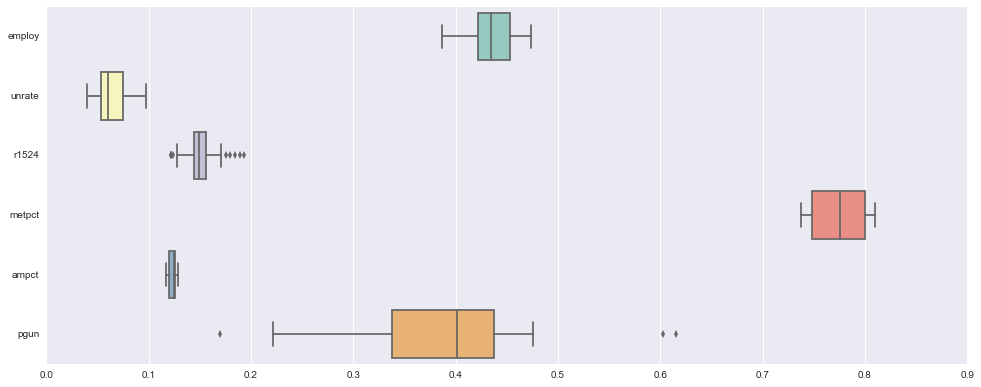

In [101]:
# só plotando percentuais para não termos problemas de escala
guns_2 = guns_year[['employ', 'unrate', 'r1524','metpct','ampct','pgun']]
ax = sns.boxplot(data=guns_2, orient="h", palette="Set3")

### Correlações

In [102]:
corr_dep = guns_year[controle].corr()
print(round(corr_dep,2))

          employ  unrate  r1524  metpct  ampct  pgun  rpci  prison  military
employ      1.00   -0.84  -0.52    0.59   0.64 -0.53  0.84    0.77     -0.76
unrate     -0.84    1.00   0.07   -0.15  -0.21  0.26 -0.49   -0.35      0.35
r1524      -0.52    0.07   1.00   -0.86  -0.85  0.57 -0.81   -0.88      0.79
metpct      0.59   -0.15  -0.86    1.00   0.83 -0.74  0.92    0.95     -0.95
ampct       0.64   -0.21  -0.85    0.83   1.00 -0.62  0.79    0.91     -0.88
pgun       -0.53    0.26   0.57   -0.74  -0.62  1.00 -0.70   -0.72      0.75
rpci        0.84   -0.49  -0.81    0.92   0.79 -0.70  1.00    0.96     -0.94
prison      0.77   -0.35  -0.88    0.95   0.91 -0.72  0.96    1.00     -0.98
military   -0.76    0.35   0.79   -0.95  -0.88  0.75 -0.94   -0.98      1.00


### Sobre as variáveis de controle

* __employ__: variável que mede população empregada formalmente; exclui emprego governamental, doméstico, e rural.  A intuição por trás dessa variável de controle é que um aumento da população desempregada ou empregada de forma precária aumentaria as taxas de crime.
* __unrate__: variável que mede população desempregada.  Novamente, a intuição é que um aumento do desemprego aumentaria as taxas de crime. 
* __r1524__: variável que mede o percentual de jovens de 15 a 24 anos de idade na população total.  A intuição por trás desse controle é que a população jovem costuma estar altamente correlacionada com o crime, sendo grande perpetradora e vítima de crimes.
* __metpct__: variável que mede o percentual da população que habita áreas urbanas.  Crimes costumam ser cometidos em áreas urbans, por isso haveria uma correlação entre aumento de áreas urbanas e crime.
* __ampct__: variável que mede o percentual da população afroamericana sobre a população total.  A intuição por trás desse controle seria que a população afroamericana estaria mais correlacionada com o crime, sendo desproporcionalmente maior perpetradora e vítima de crimes.
* __rpci__: variável que mede a renda real per capita.  Rendas maiores ou menores estariam correlacionadas com taxas menores e maiores de crime, respectivamente.
* __prison__¹: variável que mede a população prisional americana.  A intuição nos diz que maior população prisional deveria estar correlacionada com menor taxa de crimes, e por isso a variável é incluída como controle.  No entanto, a população prisional pode aumentar por conta de crimes diferentes dos estudados aqui (e.g., como o uso de drogas).
* __military__¹: variável que mede o número de militares.  Acredita-se que a inclusão da variável seja um controle sobre variações na _proxy_ para a posse de armas, porém nem LeDoux et al. (2015) nem Marvell & Moody (2005) explicitam a razão por trás da inclusão da variável. 
* __pgun__: variável que mede o percentual de domicílios que autodeclarou posse de armas de fogo na _general social survey_(GSS); é a _proxy_ escolhida para a posse de armas de fogo.  O objetivo por trás da inclusão dessa variável é testar se há efeito na taxa de crimes do aumento da posse de armas de fogo.  Variável foi interpolada linearmente por LeDoux (2015) para os anos em que a GSS não incluiu a pergunta em seu questionário.

¹: LeDoux et al. (2015) comentam que Marvell & Moody (2005) colocam as variáveis __prison__ e __military__ em escala, mas que não explicitaram qual escala foi empregada.  LeDoux faz o mesmo, calculando e escalando as variáveis de maneira independente da de Marvell & Moody, e sem explicitar qual escala foi empregada.  Aqui usamos a mesma escala utilizada por LeDoux, uma vez que para a maior parte das análises o que importa é a variação relativa das variáveis, a qual independe da escala.

___
## Variáveis Dependentes

Uma análise descritiva básica.

### Média, desvio-padrão, e percentis

In [103]:
crimes = ['murder', 'rape', 'robbery', 'burglary', 'assault', 'majorcrime']
col_desc = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

desc_dep = pd.DataFrame(index=col_desc, columns=crimes)
desc_dep = desc_dep.fillna(0)
#desc_dep

In [104]:
for d in crimes:
    dep = guns_year[d].describe()
    desc_dep[d] = round(dep,2)
print(desc_dep)

       murder    rape  robbery  burglary  assault  majorcrime
count   34.00   34.00    34.00     34.00    34.00       34.00
mean    55.26   95.24   440.09   1154.34  1288.40     3033.33
std     19.57   30.80   125.38    404.23   232.41      652.43
min     27.10   48.89   251.19    650.32   963.81     1941.32
25%     35.79   69.12   336.38    798.39  1117.64     2400.89
50%     54.27   92.51   458.09   1000.06  1224.19     3108.32
75%     72.17  124.20   552.92   1456.92  1431.44     3615.21
max     82.07  138.62   631.63   1937.71  1778.12     4084.88


### boxplot

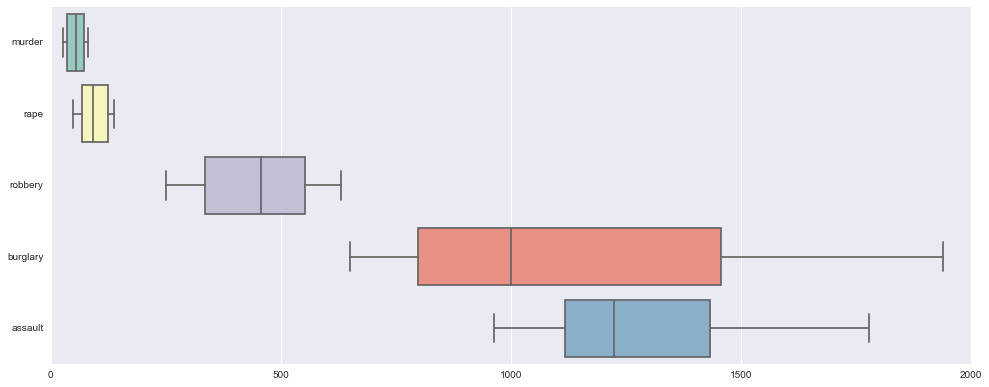

In [105]:
ax = sns.boxplot(data=guns_year[crimes[0:5]], orient="h", palette="Set3")

### Correlações

In [106]:
corr_dep = guns_year[crimes[0:5]].corr()
print(round(corr_dep,2))

          murder  rape  robbery  burglary  assault
murder      1.00  0.97     0.99      0.91     0.46
rape        0.97  1.00     0.94      0.89     0.42
robbery     0.99  0.94     1.00      0.89     0.49
burglary    0.91  0.89     0.89      1.00     0.07
assault     0.46  0.42     0.49      0.07     1.00


Provavelmente só uma regressão de crimes de lesão corporal gerará resultados muito diferentes, já que é o único tipo de crime pouco correlacionado com os outros.

___
## Análise de Correlações e Regressão Linear

Plotamos gráficos de dispersões para ver como cada variável de crime se relaciona com as variáveis de controle. Nos gráficos, quanto mais escura a cor, maior o número de domicílios que declarou possuir arma de fogo. Além disso, tentamos reproduzir algumas das análises de regressão múltipla implementadas pelos autores nos trabalhos anteriores, usando as principais variáveis de controle e a variável pgun como proxy para posse de arma. Rodamos todos os modelos corrigindo para heterocedasticidade, tal como os autores fizeram.

In [107]:
import statsmodels.formula.api as sm

In [108]:
# preparando o terreno pros próximos gráficos
crimes = ['murder', 'rape', 'robbery', 'burglary', 'assault', 'majorcrime']
crimes_pt = ['Assassinatos', 'Estupros', 'Roubos', 'Roubos à propriedade', 'Crimes de lesão corporal', 'Crimes graves']
transcrimes = dict(zip(crimes, crimes_pt))
cor = guns_year['pgun']
controle = ['employ', 'unrate', 'rpci', 'r1524', 'metpct', 'ampct', 'pgun', 'prison', 'military']
cores = ['spring', 'summer', 'plasma', 'coolwarm', 'winter', 'cool', 'viridis', 'autumn', 'magma']
titulos = ['População com emprego formal (não-rural) (%)', 'Desemprego anual médio (%)', 'Renda real per capita',
           'População 15 - 24 anos (%)', 'População residente em áreas urbanas (%)', 'População afroamericana (%)',
           'Residentes com posse de arma - GSS (%)', 'População carcerária', 'População militar']

### __murder__

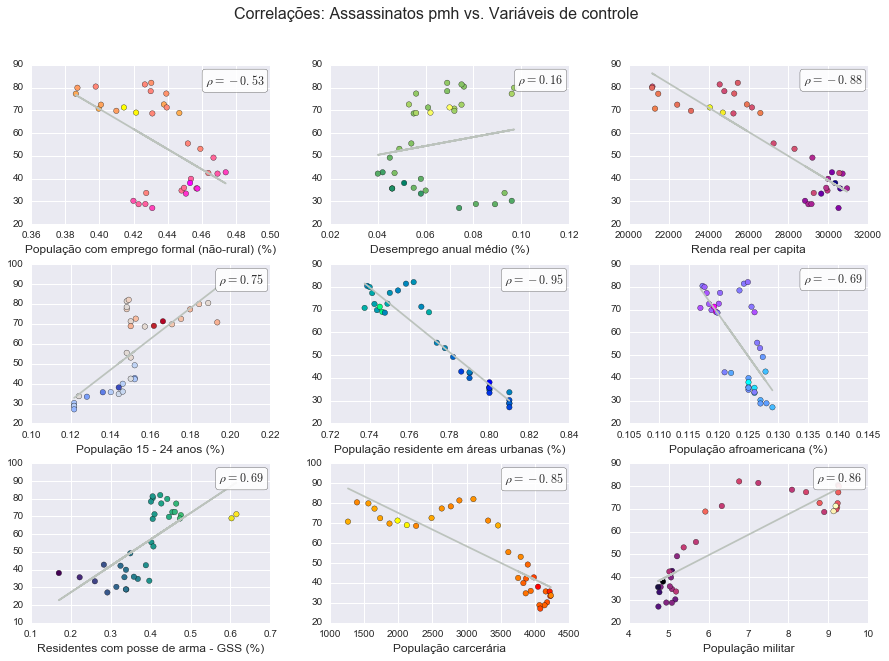

In [109]:
y = guns_year['murder']

corr=[]
for i in controle:
    matriz = np.corrcoef(y,guns_year[i])
    corr.append(matriz[1,0])

pylab.rcParams['figure.figsize'] = (15,10)

i = 0

for c in controle:
    ax = plt.subplot(3, 3, i + 1)
    coef = pl.polyfit(guns_year[c], y, 1)
    reta = pl.polyval(coef, guns_year[c])
    ax.scatter(guns_year[c], y, c = cor, s = 30, cmap = cores[i])
    ax.plot(guns_year[c], reta, '#bcc3bd')
    textstr = '$ρ=%.2f$'%(corr[i])
    props = dict(boxstyle='round', facecolor='white', alpha=0.9)
    ax.text(0.975, 0.95, textstr, transform=ax.transAxes, fontsize=12, va = 'top', ha = 'right', bbox=props)
    plt.xlabel(titulos[i], fontsize=12)
    subplots_adjust(wspace=0.25, hspace=0.25)
    i += 1

plt.suptitle('Correlações: {} pmh vs. Variáveis de controle'.format(transcrimes[y.name]), size=16)
plt.show()

De acordo com os gráficos de dispersão, o número de assassinatos tem forte correlação negativa com a renda real per capita e com a população carcerária, o que já era esperado. Outras relações são menos intuitivas: a alta correlação negativa com a população residente em áreas urbanas e positiva com a população de militares.
A variável que parece estar menos relacionada ao volume de assassinatos é o percentual de desempregados.

Intercept     -2.592468
pgun         149.103086
dtype: float64
Intercept    8.003599e-01
pgun         2.162942e-08
dtype: float64


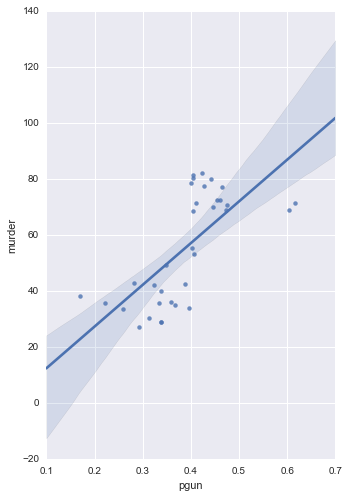

In [110]:
# Regressão Simples
pylab.rcParams['figure.figsize'] = (16.5, 6.4)

murder_res = sm.ols(formula="murder ~ pgun", data=guns_year).fit(cov_type='HC0')
print(murder_res.params)
print(murder_res.pvalues)
sns.pairplot(guns_year, x_vars = 'pgun', y_vars = 'murder', size=7, aspect=0.7, kind='reg')

In [111]:
#Regressão Múltipla
murder_res = sm.ols(formula="murder ~ pgun + employ + unrate + r1524 + metpct + ampct + rpci + prison + military", 
                    data=guns_year).fit(cov_type='HC0')
print(murder_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 murder   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     256.6
Date:                Tue, 12 Jul 2016   Prob (F-statistic):           1.26e-21
Time:                        18:52:48   Log-Likelihood:                -91.338
No. Observations:                  34   AIC:                             202.7
Df Residuals:                      24   BIC:                             217.9
Df Model:                           9                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1425.9165    296.979      4.801      0.0

Na regressão simples, o coeficiente da proxy de posse de arma foi positivo, como esperado, e significativo. Mas quando adicionamos as variáveis de controle, são significativos aos níveis de confiança usuais apenas os coeficientes das variáveis de proporção de jovens, proporção da população residente em áreas urbanas, população carcerária e populaçao militar.

### __rape__

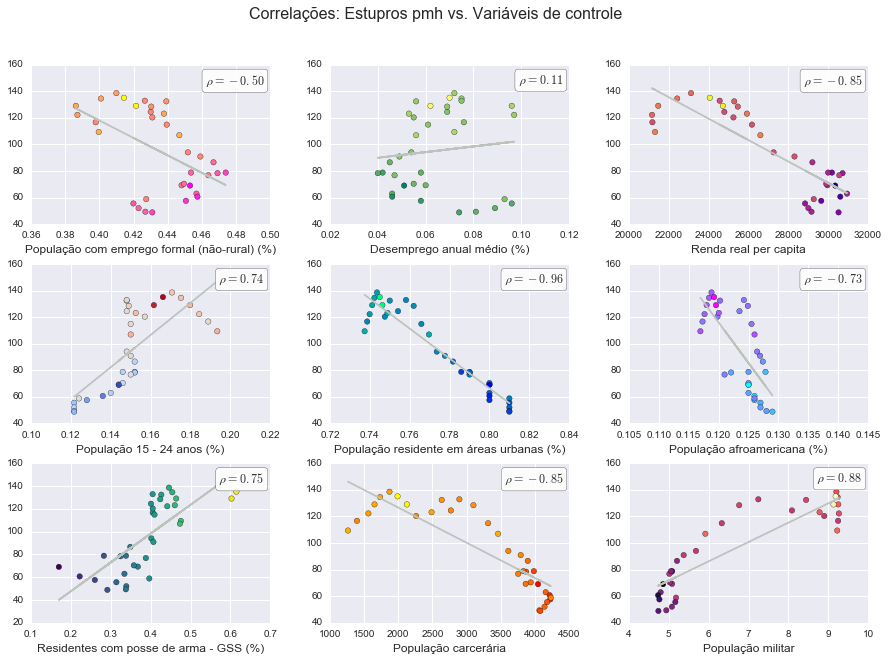

In [112]:
y = guns_year['rape']

corr=[]
for i in controle:
    matriz = np.corrcoef(y,guns_year[i])
    corr.append(matriz[1,0])

pylab.rcParams['figure.figsize'] = (15,10)

i = 0

for c in controle:
    ax = plt.subplot(3, 3, i + 1)
    coef = pl.polyfit(guns_year[c], y, 1)
    reta = pl.polyval(coef, guns_year[c])
    ax.scatter(guns_year[c], y, c = cor, s = 30, cmap = cores[i])
    ax.plot(guns_year[c], reta, '#bcc3bd')
    textstr = '$ρ=%.2f$'%(corr[i])
    props = dict(boxstyle='round', facecolor='white', alpha=0.9)
    ax.text(0.975, 0.95, textstr, transform=ax.transAxes, fontsize=12, va = 'top', ha = 'right', bbox=props)
    plt.xlabel(titulos[i], fontsize=12)
    subplots_adjust(wspace=0.25, hspace=0.25)
    i += 1

plt.suptitle('Correlações: {} pmh vs. Variáveis de controle'.format(transcrimes[y.name]), size=16)
plt.show()

As correlações das variáveis com número de estupros são bem parecidas com as de assassinatos: há forte correlação negativa com a renda real per capita, com a população residente em áreas urbanas e com a população carcerária e forte correlação positiva com a população de militares.
Esta variável parece estar ainda menos relacionada com o percentual de desempregados.

Intercept     -2.840199
pgun         252.792756
dtype: float64
Intercept    8.483914e-01
pgun         8.753717e-12
dtype: float64


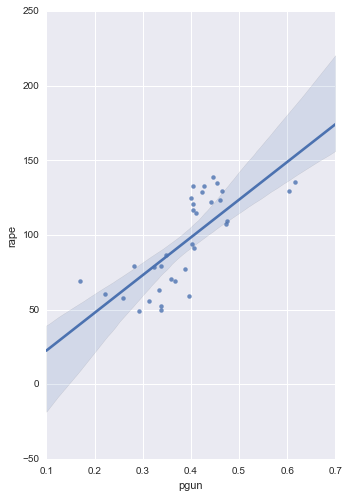

In [113]:
# Regressão Simples
rape_res = sm.ols(formula="rape ~ pgun", data=guns_year).fit(cov_type='HC0')
print(rape_res.params)
print(rape_res.pvalues)
sns.pairplot(guns_year, x_vars = 'pgun', y_vars = 'rape', size=7, aspect=0.7, kind='reg')

In [114]:
# Regressão Múltipla
rape_res = sm.ols(formula="rape ~ pgun + employ + unrate + r1524 + metpct + ampct + rpci + prison + military", 
                  data=guns_year).fit(cov_type='HC0')
print(rape_res.summary())

                            OLS Regression Results                            
Dep. Variable:                   rape   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     156.2
Date:                Tue, 12 Jul 2016   Prob (F-statistic):           4.42e-19
Time:                        18:52:53   Log-Likelihood:                -110.24
No. Observations:                  34   AIC:                             240.5
Df Residuals:                      24   BIC:                             255.8
Df Model:                           9                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2048.3534    455.471      4.497      0.0

Na regressão simples, o coeficiente da proxy de posse de arma é significativo e positivamente correlacionado com a ocorrência de estupros. Já na regressão múltipla, aos níveis de confiança usuais são significativos apenas os coeficientes das variáveis de proporção da população residente em áreas urbanas e população carcerária.

### __robbery__

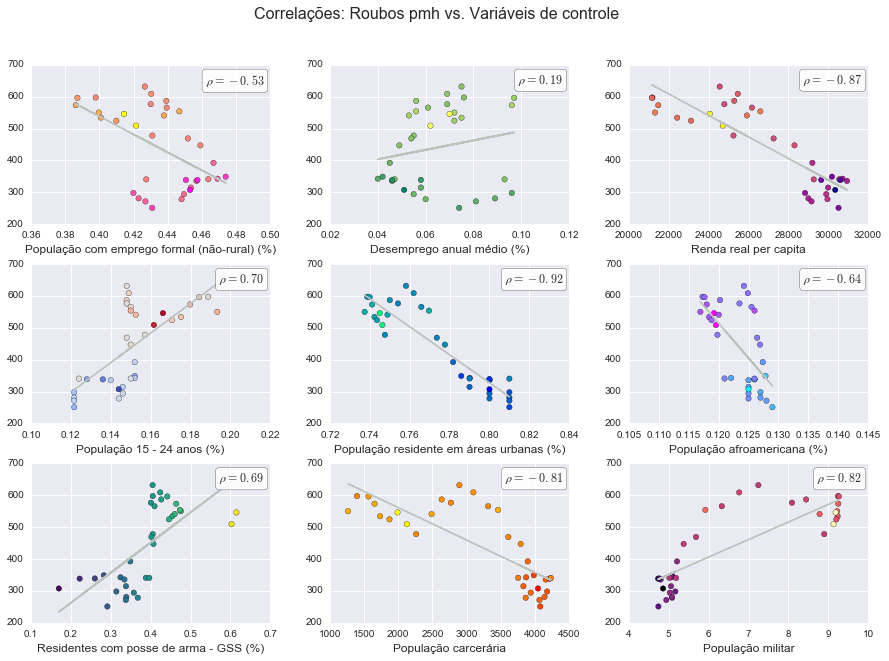

In [115]:
y = guns_year['robbery']

corr=[]
for i in controle:
    matriz = np.corrcoef(y,guns_year[i])
    corr.append(matriz[1,0])

pylab.rcParams['figure.figsize'] = (15,10)

i = 0

for c in controle:
    ax = plt.subplot(3, 3, i + 1)
    coef = pl.polyfit(guns_year[c], y, 1)
    reta = pl.polyval(coef, guns_year[c])
    ax.scatter(guns_year[c], y, c = cor, s = 30, cmap = cores[i])
    ax.plot(guns_year[c], reta, '#bcc3bd')
    textstr = '$ρ=%.2f$'%(corr[i])
    props = dict(boxstyle='round', facecolor='white', alpha=0.9)
    ax.text(0.975, 0.95, textstr, transform=ax.transAxes, fontsize=12, va = 'top', ha = 'right', bbox=props)
    plt.xlabel(titulos[i], fontsize=12)
    subplots_adjust(wspace=0.25, hspace=0.25)
    i += 1

plt.suptitle('Correlações: {} pmh vs. Variáveis de controle'.format(transcrimes[y.name]), size=16)
plt.show()

Cenário semelhante com as duas variáveis anteriores: forte correlação negativa com a renda real per capita, com a população residente em áreas urbanas e com a população carcerária e forte correlação positiva com a população de militares.
O número de roubos parece estar ainda menos relacionada com o percentual de desempregados.

Intercept     73.954940
pgun         943.687641
dtype: float64
Intercept    2.534481e-01
pgun         2.651147e-08
dtype: float64


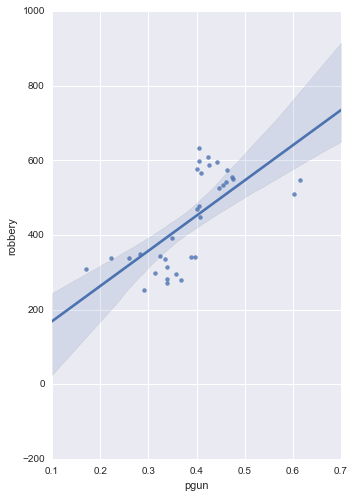

In [116]:
#Regressão Simples
robbery_res = sm.ols(formula="robbery ~ pgun", data=guns_year).fit(cov_type='HC0')
print(robbery_res.params)
print(robbery_res.pvalues)
sns.pairplot(guns_year, x_vars = 'pgun', y_vars = 'robbery', size=7, aspect=0.7, kind='reg')

In [117]:
#Regressão Múltipla
robbery_res = sm.ols(formula="robbery ~ pgun + employ + unrate + r1524 + metpct + ampct + rpci + prison + military", 
                     data=guns_year).fit(cov_type="HC0")
print(robbery_res.summary())

                            OLS Regression Results                            
Dep. Variable:                robbery   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     148.2
Date:                Tue, 12 Jul 2016   Prob (F-statistic):           8.19e-19
Time:                        18:52:57   Log-Likelihood:                -153.23
No. Observations:                  34   AIC:                             326.5
Df Residuals:                      24   BIC:                             341.7
Df Model:                           9                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    1.03e+04   1615.585      6.372      0.0

Na regressão simples, o coeficiente da proxy de posse de arma é significativo e positivamente correlacionado com a ocorrência de roubos. O modelo de regressão múltipla para roubos apresentou resultados um pouco melhores, com quase todos os coeficientes significativos aos níveis usuais, com excessão das duas variáveis de emprego e da proxy para posse de arma.

### __burglary__

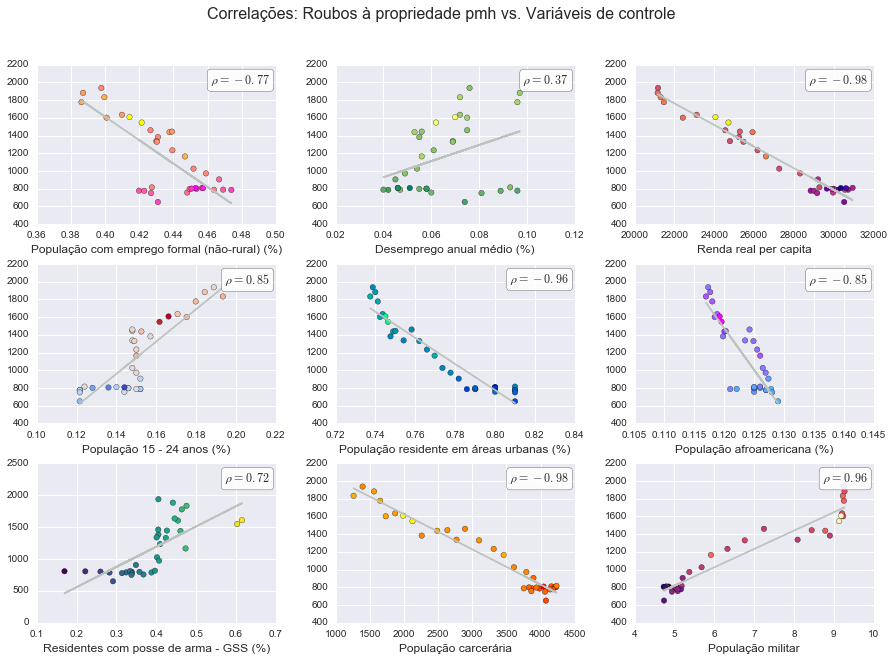

In [118]:
y = guns_year['burglary']

corr=[]
for i in controle:
    matriz = np.corrcoef(y,guns_year[i])
    corr.append(matriz[1,0])

pylab.rcParams['figure.figsize'] = (15,10)

i = 0

for c in controle:
    ax = plt.subplot(3, 3, i + 1)
    coef = pl.polyfit(guns_year[c], y, 1)
    reta = pl.polyval(coef, guns_year[c])
    ax.scatter(guns_year[c], y, c = cor, s = 30, cmap = cores[i])
    ax.plot(guns_year[c], reta, '#bcc3bd')
    textstr = '$ρ=%.2f$'%(corr[i])
    props = dict(boxstyle='round', facecolor='white', alpha=0.9)
    ax.text(0.975, 0.95, textstr, transform=ax.transAxes, fontsize=12, va = 'top', ha = 'right', bbox=props)
    plt.xlabel(titulos[i], fontsize=12)
    subplots_adjust(wspace=0.25, hspace=0.25)
    i += 1

plt.suptitle('Correlações: {} pmh vs. Variáveis de controle'.format(transcrimes[y.name]), size=16)
plt.show()

O número de roubos à propriedade tem correlação quase perfeita com a renda real per capita, com a população carcerária e com a população militar. Apresenta correlação significativa com todas as outras variáveis, inclusive com a taxa de desemprego.


Intercept     -76.407955
pgun         3172.125230
dtype: float64
Intercept    6.918471e-01
pgun         5.361822e-10
dtype: float64


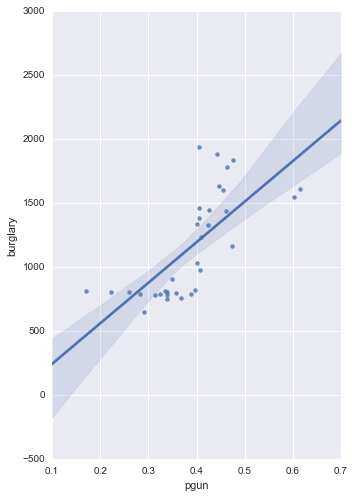

In [119]:
burglary_res = sm.ols(formula="burglary ~ pgun", data=guns_year).fit(cov_type='HC0')
print(burglary_res.params)
print(burglary_res.pvalues)
sns.pairplot(guns_year, x_vars = 'pgun', y_vars = 'burglary', size=7, aspect=0.7, kind='reg')

In [120]:
burglary_res = sm.ols(formula="burglary ~ pgun + employ + unrate + r1524 + metpct + ampct + rpci + prison + military", 
                      data=guns_year).fit(cov_type="HC0")
print(burglary_res.summary())

                            OLS Regression Results                            
Dep. Variable:               burglary   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     351.4
Date:                Tue, 12 Jul 2016   Prob (F-statistic):           3.03e-23
Time:                        18:53:01   Log-Likelihood:                -177.42
No. Observations:                  34   AIC:                             374.8
Df Residuals:                      24   BIC:                             390.1
Df Model:                           9                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.069e+04   2844.974      3.757      0.0

Na regressão simples, o coeficiente da proxy de posse de arma é significativo e positivamente correlacionado com a ocorrência de roubos à propriedade. Aos níveis usuais são significativos os coeficientes de prorporção da população residente em áreas urbanas ($\alpha$=0,1), proporção de afroamericanos, renda real per capita e população carcerária ($\alpha$=0,1). Novamente o coeficiente da proxy para posse de arma é não significativo.

### __burglary__

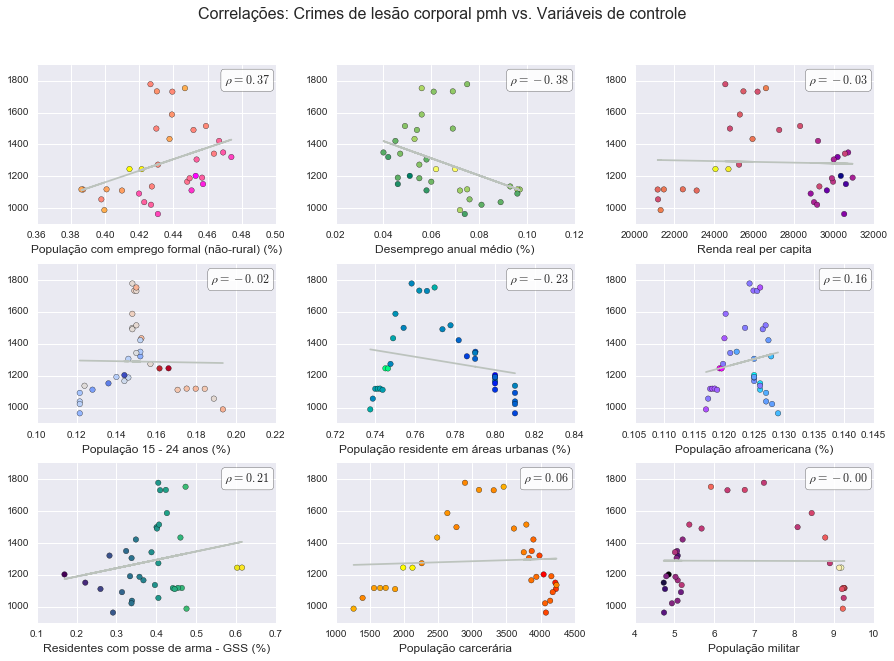

In [121]:
y = guns_year['assault']

corr=[]
for i in controle:
    matriz = np.corrcoef(y,guns_year[i])
    corr.append(matriz[1,0])

pylab.rcParams['figure.figsize'] = (15,10)

i = 0

for c in controle:
    ax = plt.subplot(3, 3, i + 1)
    coef = pl.polyfit(guns_year[c], y, 1)
    reta = pl.polyval(coef, guns_year[c])
    ax.scatter(guns_year[c], y, c = cor, s = 30, cmap = cores[i])
    ax.plot(guns_year[c], reta, '#bcc3bd')
    textstr = '$ρ=%.2f$'%(corr[i])
    props = dict(boxstyle='round', facecolor='white', alpha=0.9)
    ax.text(0.975, 0.95, textstr, transform=ax.transAxes, fontsize=12, va = 'top', ha = 'right', bbox=props)
    plt.xlabel(titulos[i], fontsize=12)
    subplots_adjust(wspace=0.25, hspace=0.25)
    i += 1

plt.suptitle('Correlações: {} pmh vs. Variáveis de controle'.format(transcrimes[y.name]), size=16)
plt.show()

Diferente de todos os outros crimes graves, os crimes de lesão corporal não apresentam correlação forte com nenhuma das variáveis explicativas selecionadas. Faz sentido, visto que, no início desta seção observamos a matriz de correlações entre os tipos de crime e este de fato era o único pouco correlacionado a todos os outros.

Intercept    1084.937298
pgun          524.412121
dtype: float64
Intercept    3.892607e-22
pgun         9.898155e-02
dtype: float64


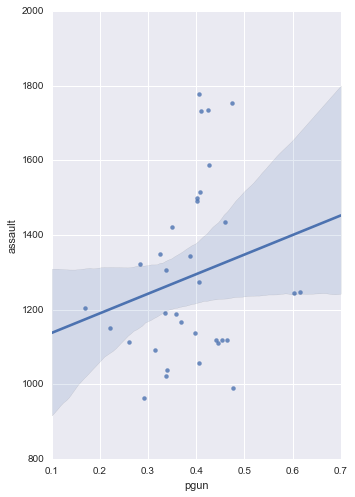

In [122]:
assault_res = sm.ols(formula="assault ~ pgun", data=guns_year).fit(cov_type='HC0')
print(assault_res.params)
print(assault_res.pvalues)
sns.pairplot(guns_year, x_vars = 'pgun', y_vars = 'assault', size=7, aspect=0.7, kind='reg')

In [123]:
assault_res = sm.ols(formula="assault ~ pgun + employ + unrate + r1524 + metpct + ampct + rpci + prison + military", 
                     data=guns_year).fit(cov_type="HC0")
print(assault_res.summary())

                            OLS Regression Results                            
Dep. Variable:                assault   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     82.49
Date:                Tue, 12 Jul 2016   Prob (F-statistic):           7.48e-16
Time:                        18:53:04   Log-Likelihood:                -195.50
No. Observations:                  34   AIC:                             411.0
Df Residuals:                      24   BIC:                             426.3
Df Model:                           9                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.755e+04   5213.637      5.284      0.0

Tanto na regressão simples como na múltipla, os coeficientes da proxy para porte de arma são positivamente correlacionados com a ocorrência de crimes de lesão corporal e significativos a $\alpha$ = 0,1. Na regressão múltipla são significativos também: proporção de jovens, proporção da população residente em áreas urbanas, proporção de afroamericanos e população carcerária. Este foi o único modelo em que o coeficiente da proxy de posse de armas foi significativo.

Em geral, os resultados das regressões lineares não foram satisfatórios, visto que os coeficientes de nossa principal variável explicativa (proxy para posse de armas) não são significativos para a maioria das variáveis de crimes graves. Além disso, em todos os casos o número de condicionamento da matriz de variáveis explicativas é maior que 30, o que sugere presença de multicolinearidade, ie, algumas variáveis explicativas são fortemente correlacionadas entre si e estão deixando o modelo instável. Em um futuro estudo, teríamos que estudar melhor as variáveis para escolher quais devem ou não permanecer no modelo. Além disso, a proxy para posse de arma ainda parece não estar bem especificada. Estes tratamentos requerem melhor conhecimento da população em estudo.